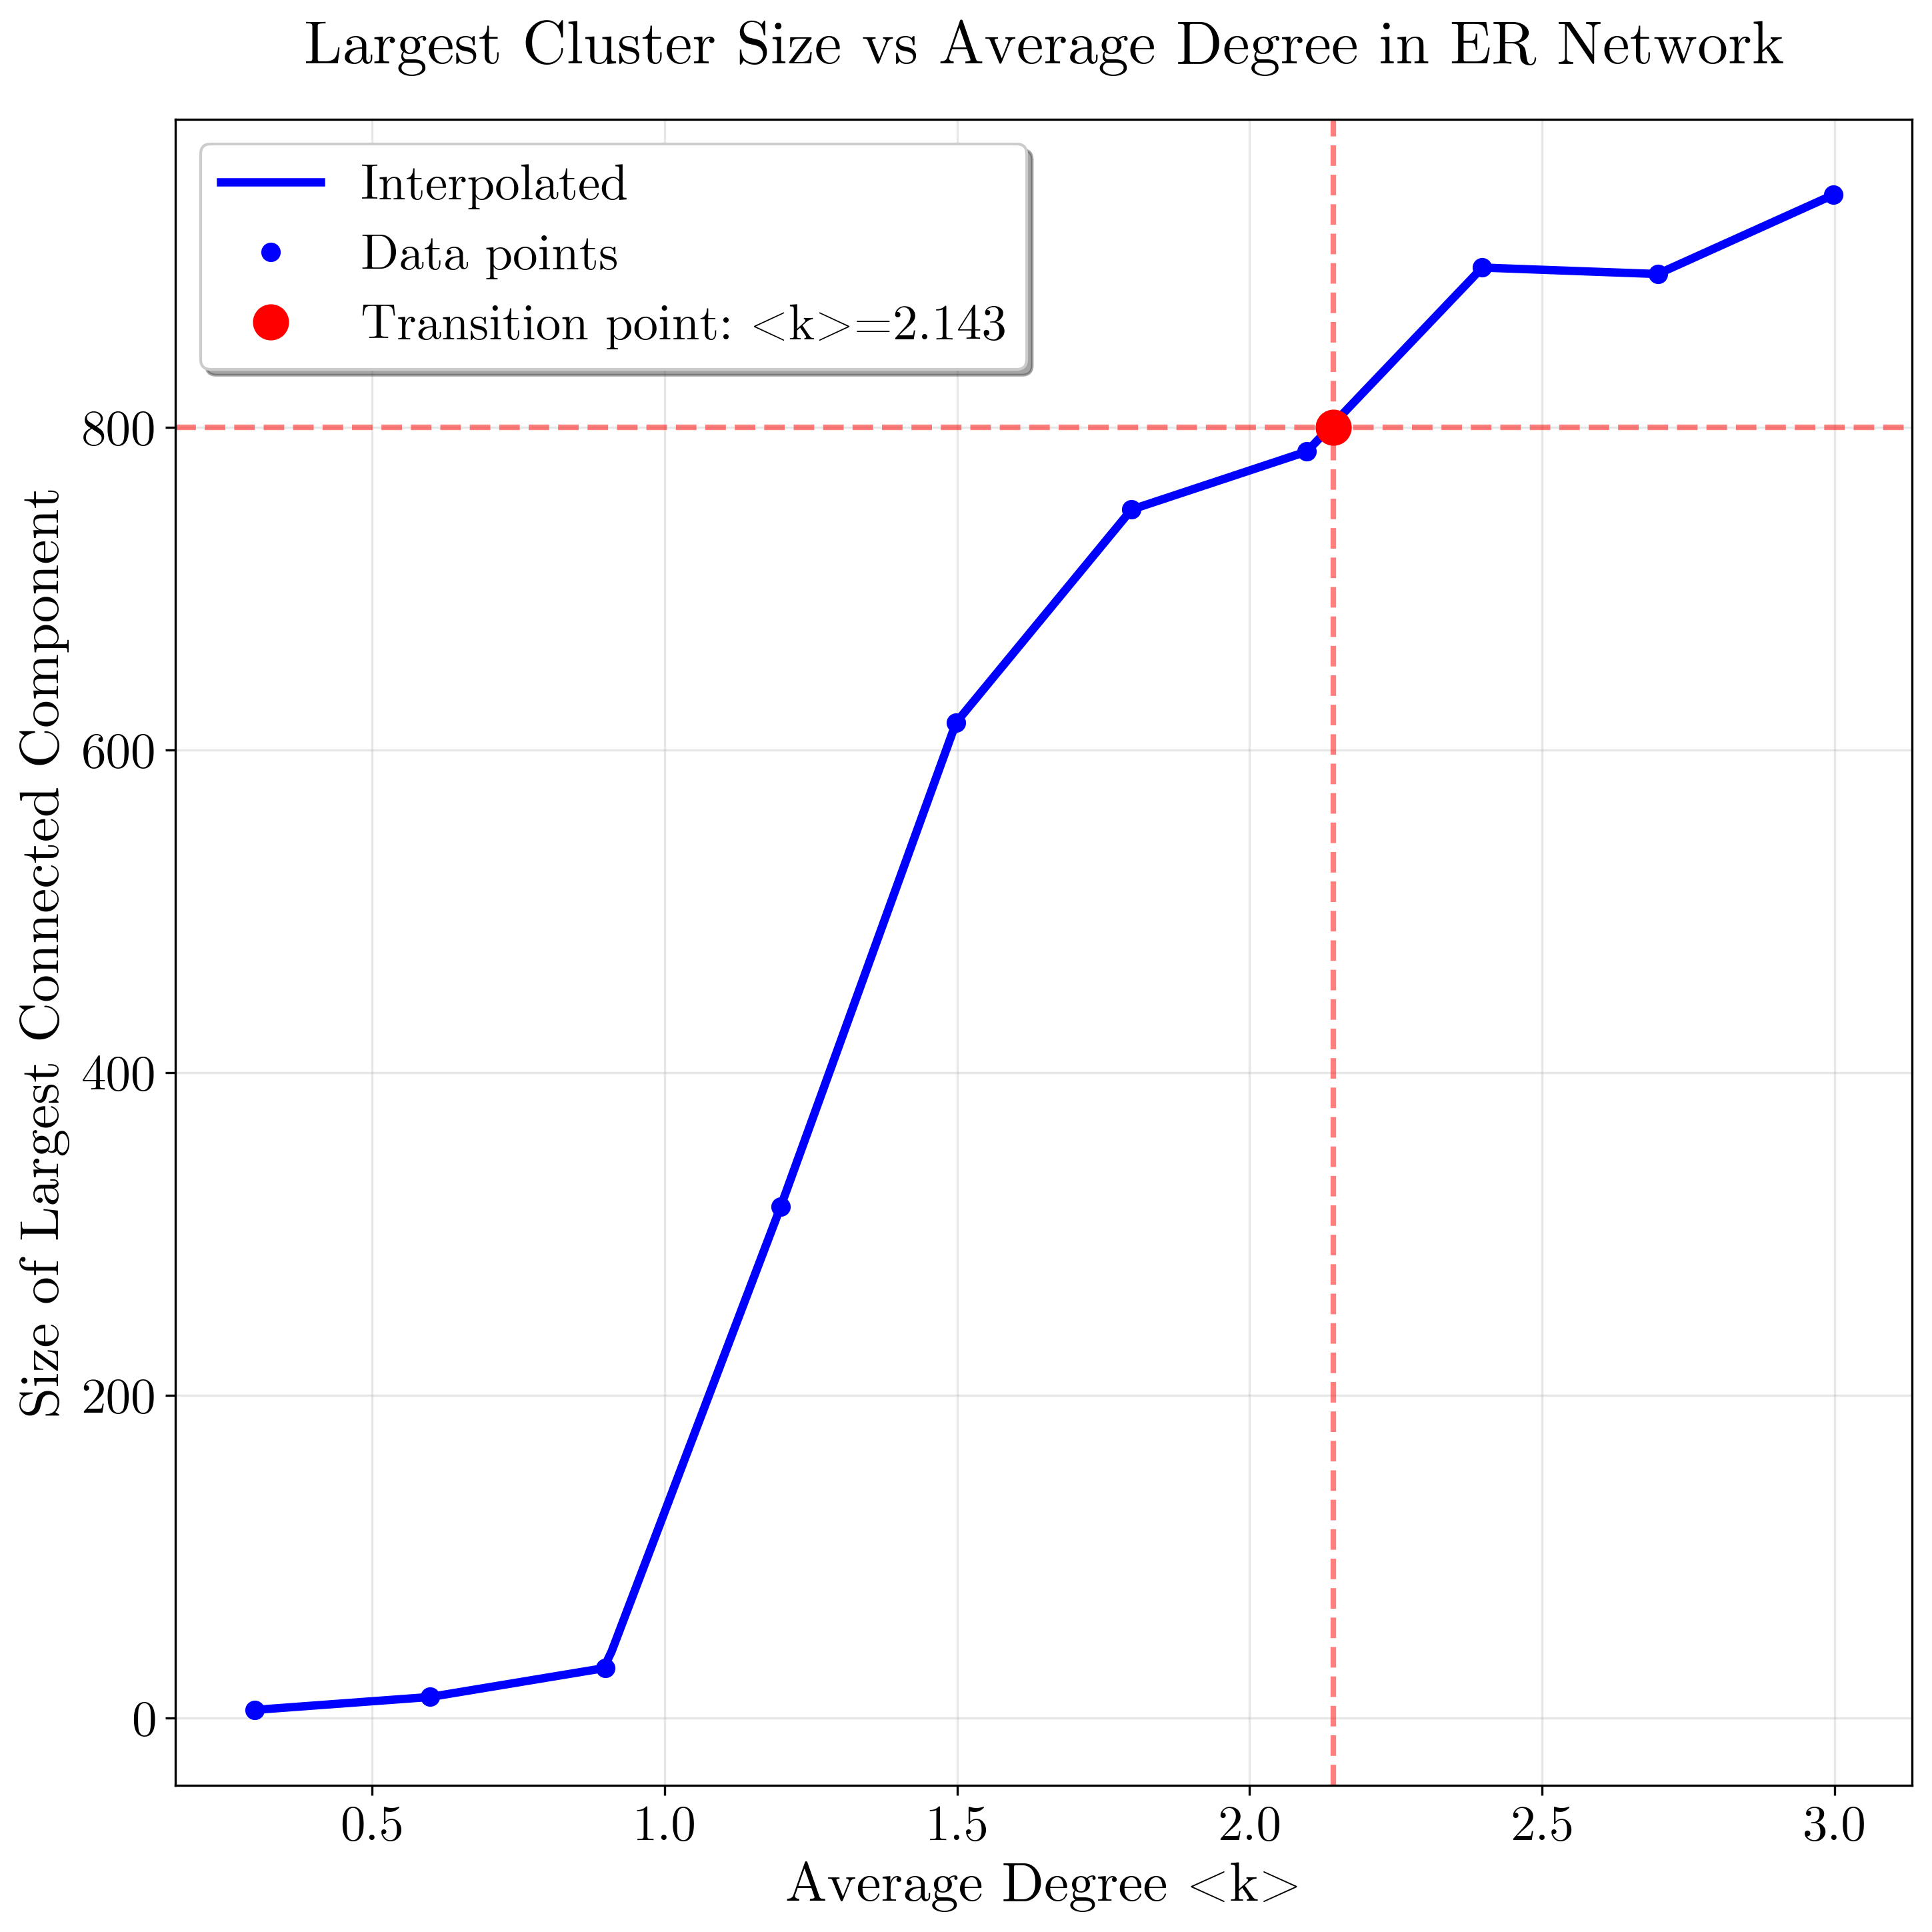

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Set font family and sizes for better quality
# remove CMU Serif if not installed
plt.rcParams.update(
    {
        "font.family": "CMU Serif",
        "font.size": 18,
        "axes.labelsize": 20,
        "axes.titlesize": 22,
        "xtick.labelsize": 18,
        "ytick.labelsize": 18,
        "legend.fontsize": 18,
    }
)

# Parameters
N = 1000
p_values = np.linspace(0.0003, 0.003, 10)
avg_degree = p_values * (N - 1)
largest_cluster_sizes = []

# Simulate ER graph for each p
for p in p_values:
    A = np.triu(np.random.rand(N, N) < p, 1)
    A = A + A.T
    G = nx.from_numpy_array(A)
    largest_cluster_sizes.append(max(len(c) for c in nx.connected_components(G)))

# Create interpolation function
f = interp1d(avg_degree, largest_cluster_sizes, kind="linear")

# Create finer x points for smoother curve
x_smooth = np.linspace(min(avg_degree), max(avg_degree), 200)
y_smooth = f(x_smooth)

# Find transition point at 80% threshold using interpolated values
threshold = 0.8 * N
k_transition = x_smooth[next(i for i, size in enumerate(y_smooth) if size >= threshold)]

# Create high quality figure
plt.figure(figsize=(10, 10), dpi=300)
plt.plot(x_smooth, y_smooth, "b-", linewidth=3, label="Interpolated")
plt.plot(avg_degree, largest_cluster_sizes, "b.", markersize=12, label="Data points")
plt.axvline(x=k_transition, color="r", linestyle="--", alpha=0.5, linewidth=2)
plt.axhline(y=threshold, color="r", linestyle="--", alpha=0.5, linewidth=2)
plt.plot(
    k_transition,
    threshold,
    "ro",
    markersize=12,
    label=f"Transition point: <k>={k_transition:.3f}",
)

plt.xlabel("Average Degree <k>", fontweight="bold")
plt.ylabel("Size of Largest Connected Component", fontweight="bold")
plt.title("Largest Cluster Size vs Average Degree in ER Network", pad=20)
plt.grid(True, alpha=0.3)
plt.legend(frameon=True, fancybox=True, shadow=True)

# Add padding to prevent label cutoff
plt.tight_layout()
plt.show()

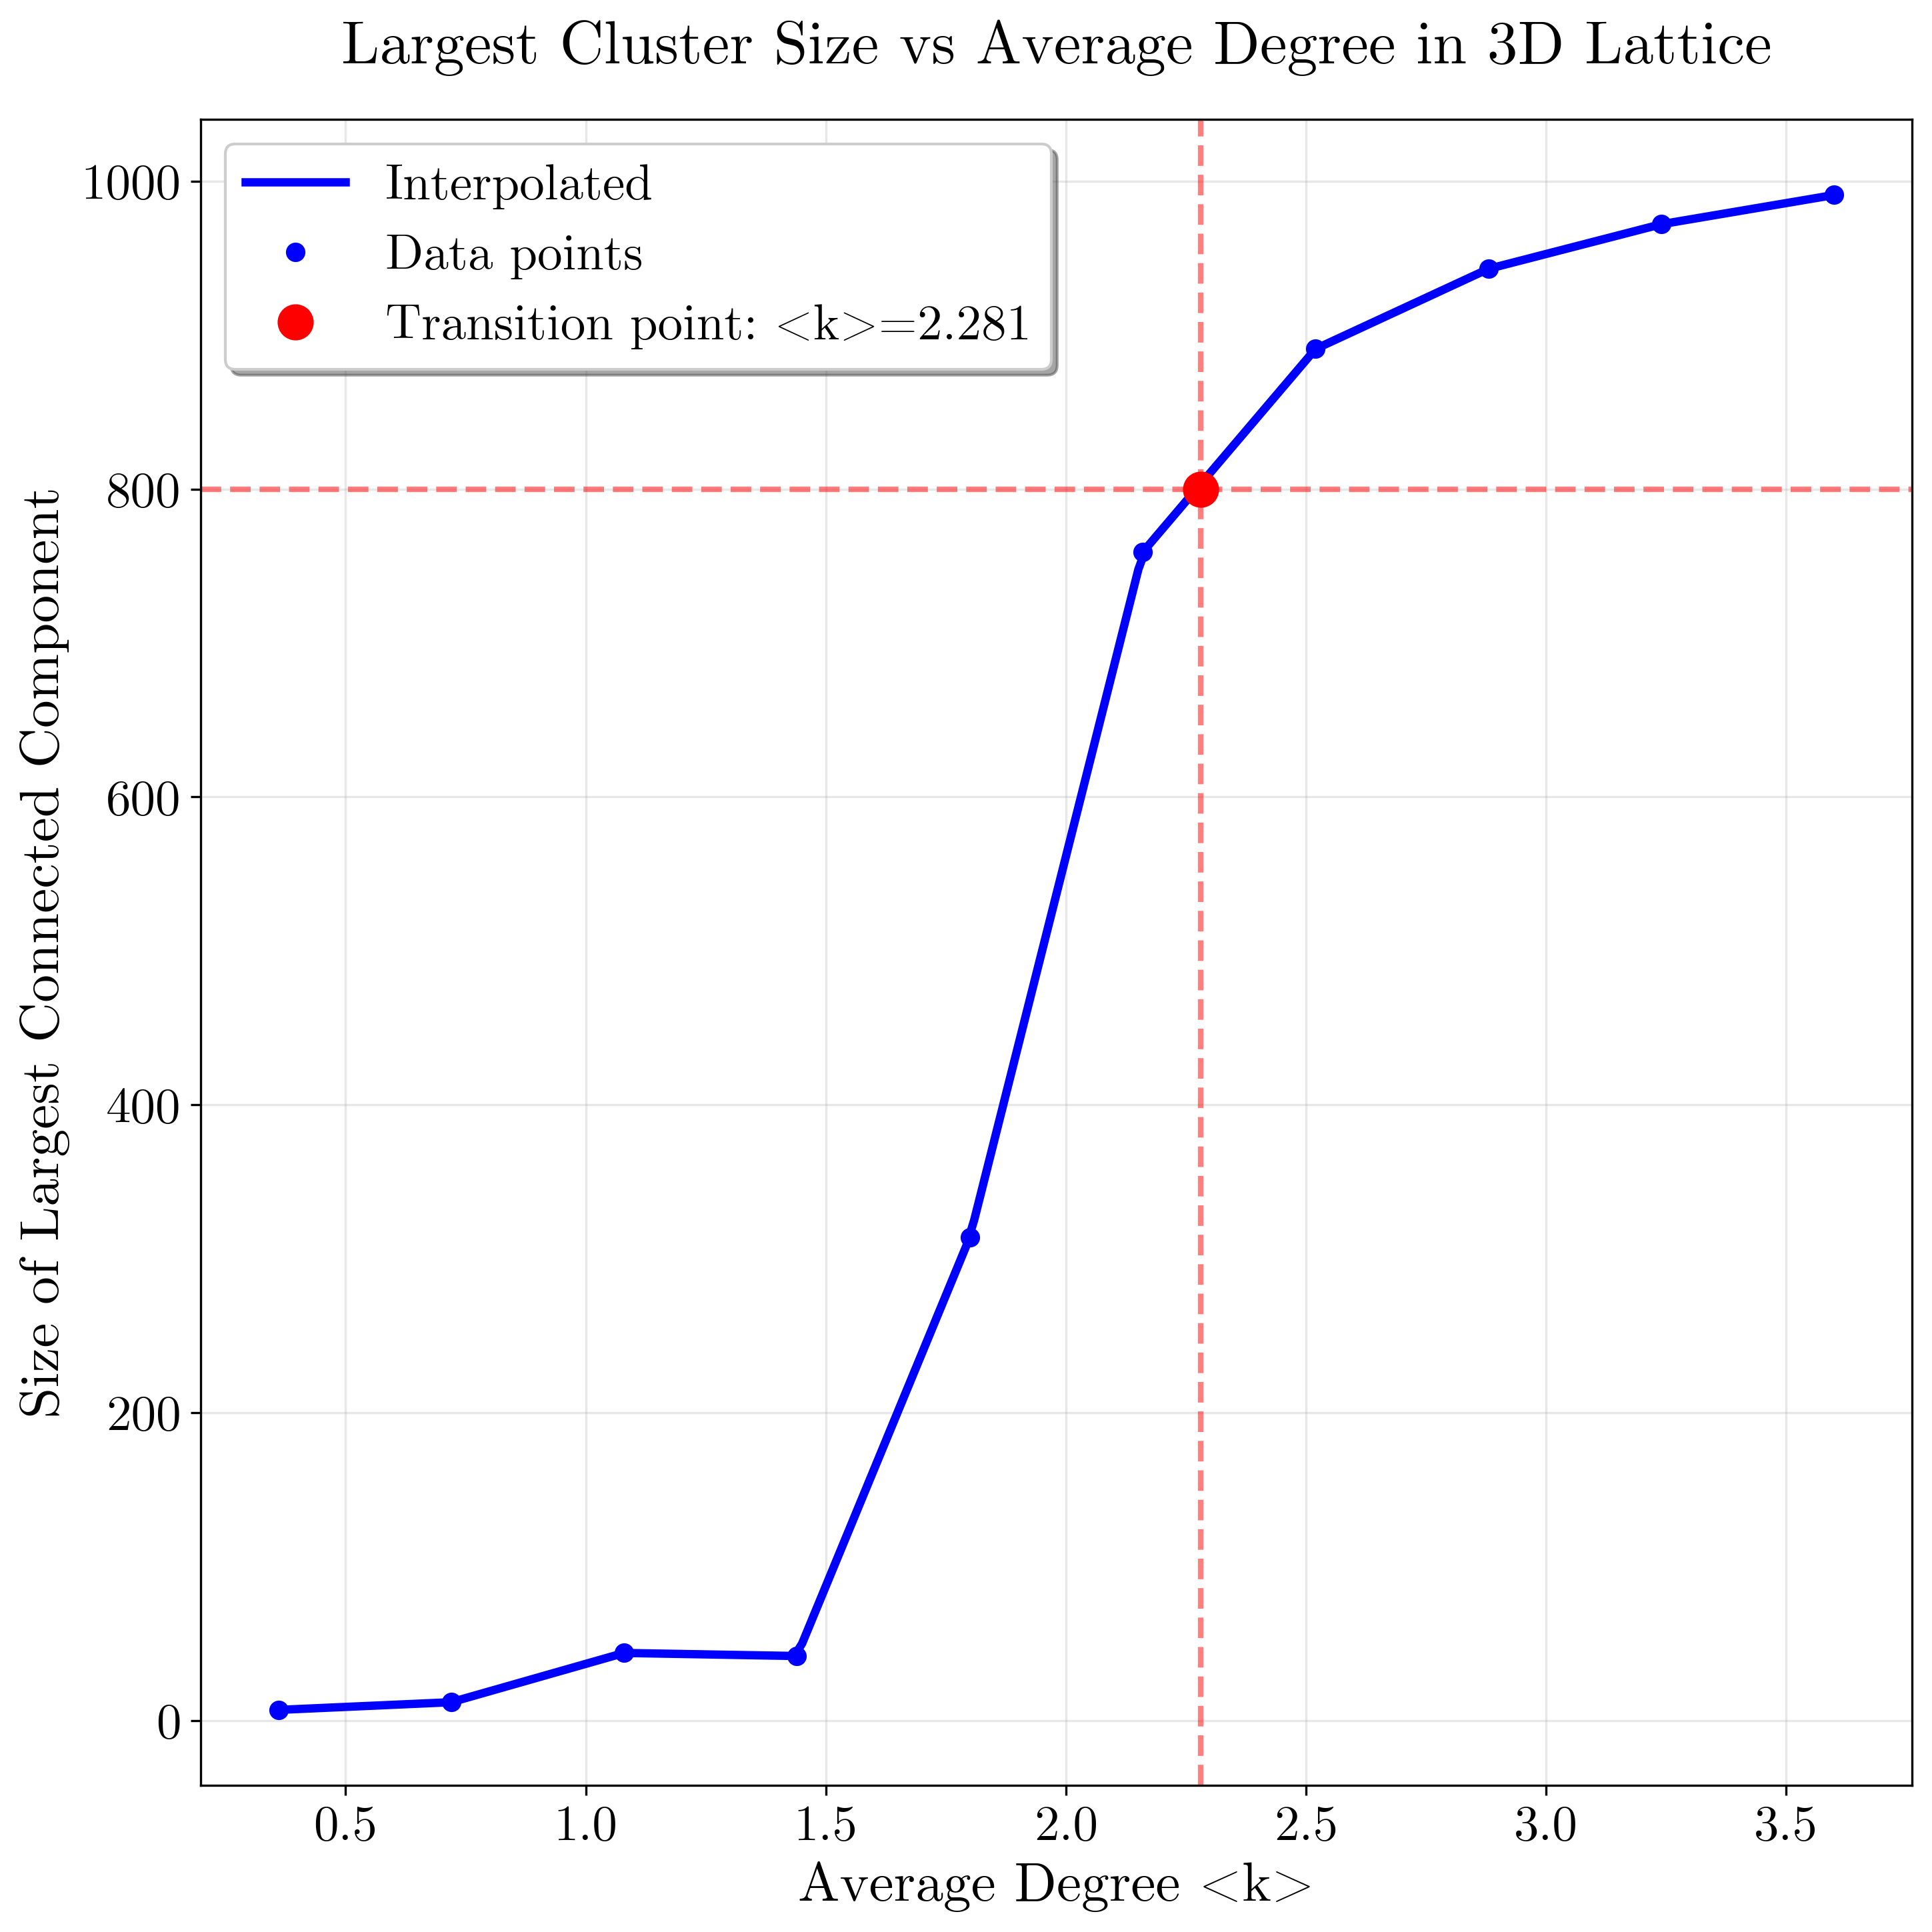

In [3]:
# CODE INDEPENDENT OF 3.B for Reproducibility
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Set font sizes and DPI for high-quality output
plt.rcParams.update(
    {
        "font.family": "CMU Serif",
        "font.size": 18,
        "axes.labelsize": 20,
        "axes.titlesize": 22,
        "xtick.labelsize": 18,
        "ytick.labelsize": 18,
        "legend.fontsize": 18,
    }
)

# Parameters
N = 1000  # 10x10x10 lattice = 1000 nodes
dims = (10, 10, 10)
p_values = np.arange(0.06, 0.61, 0.06)  # 0.06 to 0.6, step 0.06
avg_degree = 6 * p_values  # Max 6 neighbors in 3D lattice
largest_cluster_sizes = []


# Function to convert 3D coordinates to node index
def xyz_to_index(x, y, z):
    return 100 * x + 10 * y + z


# Simulate cubic lattice for each p
for p in p_values:
    G = nx.grid_graph(dim=dims)  # 10x10x10 lattice
    # Remove edges randomly: keep with probability p
    edges_to_remove = [(u, v) for u, v in G.edges() if np.random.rand() > p]
    G.remove_edges_from(edges_to_remove)
    largest_cluster_sizes.append(max(len(c) for c in nx.connected_components(G)))

# Interpolation for smoother curve
f = interp1d(avg_degree, largest_cluster_sizes, kind="linear")
x_smooth = np.linspace(min(avg_degree), max(avg_degree), 200)
y_smooth = f(x_smooth)

# Find <k> at 80% threshold (800 nodes)
threshold = 0.8 * N
k_transition = x_smooth[next(i for i, size in enumerate(y_smooth) if size >= threshold)]

# Plot
plt.figure(figsize=(10, 10), dpi=300)
plt.plot(x_smooth, y_smooth, "b-", linewidth=3, label="Interpolated")
plt.plot(avg_degree, largest_cluster_sizes, "b.", markersize=12, label="Data points")
plt.axvline(x=k_transition, color="r", linestyle="--", alpha=0.5, linewidth=2)
plt.axhline(y=threshold, color="r", linestyle="--", alpha=0.5, linewidth=2)
plt.plot(
    k_transition,
    threshold,
    "ro",
    markersize=12,
    label=f"Transition point: <k>={k_transition:.3f}",
)

plt.xlabel("Average Degree <k>", fontweight="bold")
plt.ylabel("Size of Largest Connected Component", fontweight="bold")
plt.title("Largest Cluster Size vs Average Degree in 3D Lattice", pad=20)
plt.grid(True, alpha=0.3)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.tight_layout()
plt.show()